Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


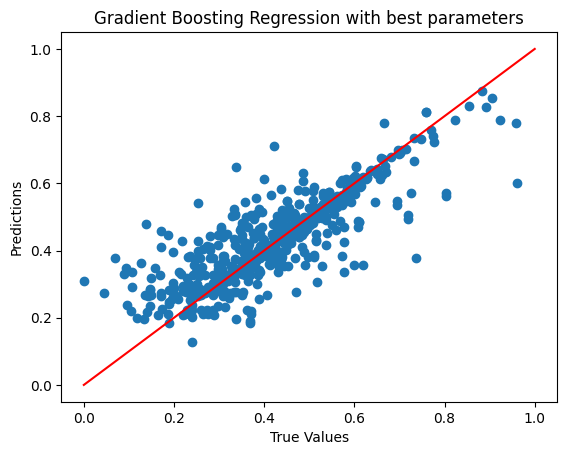

Gradient Boosting Regression Accuracy with best parameters: 67.94% (5.51%)
Gradient Boosting Regression MSE with best parameters: 0.008301468922050307, R2 with best parameters: 0.6682777398308583


In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler # For Scaling
from sklearn.model_selection import train_test_split, KFold, cross_val_score # for Kfold and the cross valiation score
from sklearn.ensemble import RandomForestRegressor # our Model
from sklearn.model_selection import GridSearchCV # GridsearchCV for find best parameter
from sklearn.metrics import mean_squared_error, r2_score # Evaluation metrics for Regression
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/semifinaldata_6.csv')

# One-Hot-Encoding(get_dumies)
encoded_df = pd.get_dummies(df, columns=['District'], dtype=int)

# Prepare Dataset
X = encoded_df[['pm25', 'pm10', 'o3', 'so2', 'no2', 'co']]
y = encoded_df['AVG']
Districts = ['District_강원도', 'District_경기도',  'District_경상남도', 'District_경상북도', 'District_광주광역시',  'District_대구광역시',  'District_대전광역시',  'District_부산광역시',  'District_서울특별시', 'District_세종특별자치시',  'District_울산광역시',  'District_인천광역시',  'District_전라남도', 'District_전라북도',  'District_제주특별자치도',  'District_충청남도',  'District_충청북도'   ]

# Standard Scaling for X
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

# Concatenate Districts with X_scaled
X_scaled_with_districts = encoded_df[Districts].copy()
X_scaled_with_districts[X.columns] = X_scaled

# MinMax Scaling for y
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

kfold = KFold(n_splits=11, random_state=0, shuffle=True) # Best n_split = 11

# Train/Test set 
X_train, X_test, y_train, y_test = train_test_split(X_scaled_with_districts, y_scaled, test_size=0.3, random_state=0)

from sklearn.ensemble import GradientBoostingRegressor # our new Model

# Define the parameter grid for grid search
param_grid_boost = {
    'n_estimators': [100, 200, 300],  # The number of boosting stages to perform
    'max_depth': [None, 5, 10],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # The minimum number of samples required to be at a leaf node
    'learning_rate': [0.01, 0.1, 1],  # Learning rate shrinks the contribution of each tree
    'max_features': ['auto', 'sqrt', 'log2']  # The number of features to consider when looking for the best split
}

grid_search_boost = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid_boost, cv=3)
grid_search_boost.fit(X_train, y_train.ravel()) # y_train should be a 1D array for sklearn

# Best parameters
best_params_boost = grid_search_boost.best_params_
print("Best Parameters:", best_params_boost)

# Gradient Boosting Regression with best parameters
gradient_boost_model_best = GradientBoostingRegressor(**best_params_boost)
gradient_boost_model_best.fit(X_train, y_train.ravel()) # y_train should be a 1D array for sklearn
y_pred_gradient_boost_best = gradient_boost_model_best.predict(X_test)

# Evaluation for model with best parameters
mse_gradient_boost_best = mean_squared_error(y_test, y_pred_gradient_boost_best)
r2_gradient_boost_best = r2_score(y_test, y_pred_gradient_boost_best)

# Scatter plot for Gradient Boosting Regression with best parameters
plt.scatter(y_test, y_pred_gradient_boost_best)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Gradient Boosting Regression with best parameters")
plt.plot([0, 1], [0, 1], color='red')
plt.show()

# Apply k-Fold Cross Validation for Gradient Boosting with best parameters
results_gradient_boost_best = cross_val_score(gradient_boost_model_best, X_train, y_train.ravel(), cv=kfold) # y_train should be a 1D array for sklearn

# Print cross validation score for Gradient Boosting with best parameters
print("Gradient Boosting Regression Accuracy with best parameters: %.2f%% (%.2f%%)" % (results_gradient_boost_best.mean()*100, results_gradient_boost_best.std()*100))
print(f"Gradient Boosting Regression MSE with best parameters: {mse_gradient_boost_best}, R2 with best parameters: {r2_gradient_boost_best}")





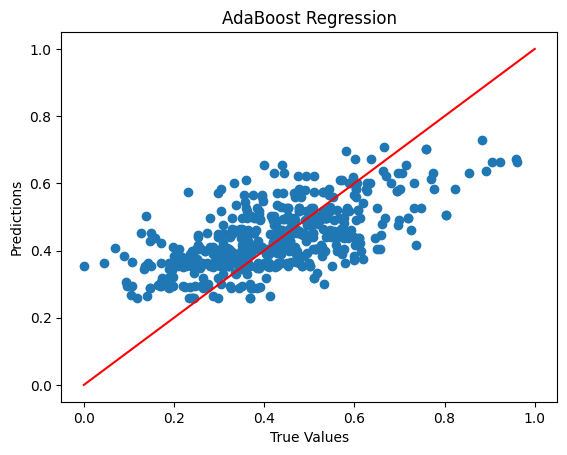

AdaBoost Regression Accuracy: 40.55% (6.58%)
AdaBoost Regression MSE: 0.015071894651771965, R2: 0.39773514713319336


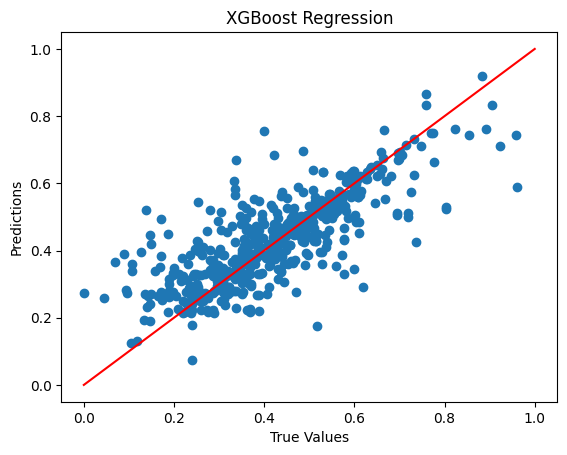

XGBoost Regression Accuracy: 62.24% (6.53%)
XGBoost Regression MSE: 0.010093929329090269, R2: 0.5966519802128675


In [3]:
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

# AdaBoost
ada_boost_model = AdaBoostRegressor()
ada_boost_model.fit(X_train, y_train.ravel())
y_pred_ada_boost = ada_boost_model.predict(X_test)

# Evaluation for AdaBoost
mse_ada_boost = mean_squared_error(y_test, y_pred_ada_boost)
r2_ada_boost = r2_score(y_test, y_pred_ada_boost)

# Scatter plot for AdaBoost
plt.scatter(y_test, y_pred_ada_boost)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("AdaBoost Regression")
plt.plot([0, 1], [0, 1], color='red')
plt.show()

# Apply k-Fold Cross Validation for AdaBoost
results_ada_boost = cross_val_score(ada_boost_model, X_train, y_train.ravel(), cv=kfold)

# Print cross validation score for AdaBoost
print("AdaBoost Regression Accuracy: %.2f%% (%.2f%%)" % (results_ada_boost.mean()*100, results_ada_boost.std()*100))
print(f"AdaBoost Regression MSE: {mse_ada_boost}, R2: {r2_ada_boost}")


# XGBoost
xg_boost_model = xgb.XGBRegressor()
xg_boost_model.fit(X_train, y_train.ravel())
y_pred_xg_boost = xg_boost_model.predict(X_test)

# Evaluation for XGBoost
mse_xg_boost = mean_squared_error(y_test, y_pred_xg_boost)
r2_xg_boost = r2_score(y_test, y_pred_xg_boost)

# Scatter plot for XGBoost
plt.scatter(y_test, y_pred_xg_boost)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("XGBoost Regression")
plt.plot([0, 1], [0, 1], color='red')
plt.show()

# Apply k-Fold Cross Validation for XGBoost
results_xg_boost = cross_val_score(xg_boost_model, X_train, y_train.ravel(), cv=kfold)

# Print cross validation score for XGBoost
print("XGBoost Regression Accuracy: %.2f%% (%.2f%%)" % (results_xg_boost.mean()*100, results_xg_boost.std()*100))
print(f"XGBoost Regression MSE: {mse_xg_boost}, R2: {r2_xg_boost}")


Best K for Random Forest Regression: 14, Accuracy: 63.33%


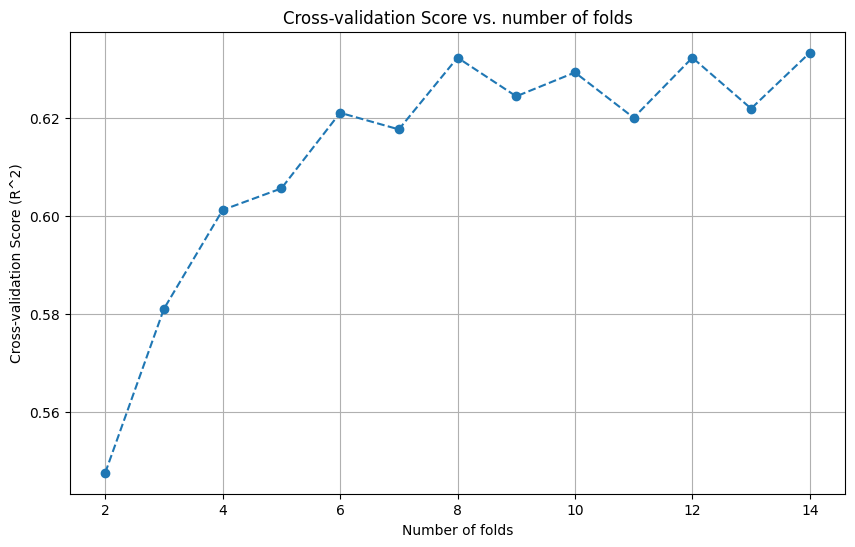

In [7]:
# List to store scores
scores_rf = []

# K values to try
k_values = range(2, 15)

# For each K value...
for k in k_values:
    # Create a KFold object
    kfold = KFold(n_splits=k, random_state=0, shuffle=True)
    
    # Create a Random Forest Regressor model
    random_forest_model = RandomForestRegressor()
    
    # Apply k-Fold Cross Validation
    result_rf = cross_val_score(random_forest_model, X_train, y_train.ravel(), cv=kfold)
    
    # Record average accuracy
    scores_rf.append(result_rf.mean())

# Print the best K and its score for Random Forest Regression
best_k_rf = k_values[scores_rf.index(max(scores_rf))]
print(f"Best K for Random Forest Regression: {best_k_rf}, Accuracy: {max(scores_rf)*100:.2f}%")

# Plotting the scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores_rf, marker='o', linestyle='dashed')
plt.title('Cross-validation Score vs. number of folds')
plt.xlabel('Number of folds')
plt.ylabel('Cross-validation Score (R^2)')
plt.grid()
plt.show()



In [9]:
import pandas as pd
df = pd.read_csv('data/final.csv')
print(df.describe())

       Unnamed: 0.1    Unnamed: 0          year          pm25          pm10   
count  13872.000000  13872.000000  13872.000000  13872.000000  13871.000000  \
mean    6935.500000   6935.500000   2015.056228     11.582050     45.031470   
std     4004.645802   4004.645802      3.167769     12.770449     15.575479   
min        0.000000      0.000000   2010.000000      0.000000      0.000000   
25%     3467.750000   3467.750000   2012.000000      0.000000     33.000000   
50%     6935.500000   6935.500000   2015.000000      7.876068     43.000000   
75%    10403.250000  10403.250000   2018.000000     22.000000     55.000000   
max    13871.000000  13871.000000   2020.000000     57.000000    133.000000   

                so2            o3           no2            co           AVG  
count  13872.000000  13872.000000  13872.000000  13872.000000  13872.000000  
mean       0.004324      0.025964      0.020943      0.493100     82.157301  
std        0.001827      0.010233      0.009229      0

In [10]:
import pandas as pd
df = pd.read_csv('data/semifinaldata_4.csv')
print(df.describe())

              year         pm25         pm10          so2           o3   
count  1777.000000  1777.000000  1777.000000  1777.000000  1777.000000  \
mean   2016.493528    24.670608    43.588943     0.004057     0.028406   
std       2.718200     4.822813     8.526077     0.001287     0.004389   
min    2010.000000    11.417000    19.750000     0.001000     0.012000   
25%    2015.000000    21.417000    37.967000     0.003000     0.026000   
50%    2017.000000    24.625000    43.417000     0.004000     0.028000   
75%    2019.000000    27.900000    48.417000     0.005000     0.031000   
max    2020.000000    50.290000    95.750000     0.011000     0.046000   

               no2           co          AVG  
count  1777.000000  1777.000000  1777.000000  
mean      0.018295     0.484762    82.295980  
std       0.006707     0.086962     1.300993  
min       0.005000     0.233000    78.410000  
25%       0.014000     0.433000    81.400000  
50%       0.017000     0.479000    82.270000  
75% 